<a href="https://colab.research.google.com/github/fajri-99/Orbit-Ventura/blob/main/Computer_Vision_Klasifikasi%20Penyakit%20Cabai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMAGE DATASHET

In [ ]:
!wget --no-check-certificate \
https://github.com/Rifqiakmals12/Identification-Disease-In-Plants-Chili-Using-CNN-Method/raw/main/chili-plant-disease.zip

--2022-03-24 10:01:42--  https://github.com/Rifqiakmals12/Identification-Disease-In-Plants-Chili-Using-CNN-Method/raw/main/chili-plant-disease.zip
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Rifqiakmals12/Identification-Disease-In-Plants-Chili-Using-CNN-Method/main/chili-plant-disease.zip [following]
--2022-03-24 10:01:43--  https://raw.githubusercontent.com/Rifqiakmals12/Identification-Disease-In-Plants-Chili-Using-CNN-Method/main/chili-plant-disease.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6508713 (6.2M) [application/zip]
Saving to: ‘chili-plant-disease.zip’

chili-plant-disease

In [ ]:
!unzip '/content/chili-plant-disease.zip'

Archive:  /content/chili-plant-disease.zip
   creating: chili-plant-disease/
   creating: chili-plant-disease/Test/
   creating: chili-plant-disease/Test/healthy/
  inflating: chili-plant-disease/Test/healthy/Cabai sehat001.jpg  
  inflating: chili-plant-disease/Test/healthy/Cabai sehat002.jpg  
  inflating: chili-plant-disease/Test/healthy/Cabai sehat003.jpg  
  inflating: chili-plant-disease/Test/healthy/Cabai sehat004.jpg  
  inflating: chili-plant-disease/Test/healthy/Cabai sehat005.jpg  
  inflating: chili-plant-disease/Test/healthy/Cabai sehat006.jpg  
  inflating: chili-plant-disease/Test/healthy/Cabai sehat007.jpg  
  inflating: chili-plant-disease/Test/healthy/Cabai sehat008.jpg  
  inflating: chili-plant-disease/Test/healthy/Cabai sehat009.jpg  
  inflating: chili-plant-disease/Test/healthy/Cabai sehat010.jpg  
  inflating: chili-plant-disease/Test/healthy/Cabai sehat011.jpg  
  inflating: chili-plant-disease/Test/healthy/Cabai sehat012.jpg  
  inflating: chili-plant-disease/

In [ ]:
train_healthy_dir = os.path.join('/content/chili-plant-disease/Train/healthy')

train_leafcurl_dir = os.path.join('/content/chili-plant-disease/Train/leaf curl')

valid_healthy_dir = os.path.join('/content/chili-plant-disease/Valid/healthy')

valid_leafcurl_dir = os.path.join('/content/chili-plant-disease/Valid/leaf curl')

In [ ]:
train_healthy_names = os.listdir(train_healthy_dir)
print(train_healthy_names[:10])

train_leafcurl_names = os.listdir(train_leafcurl_dir)
print(train_leafcurl_names[:10])

validation_healthy_hames = os.listdir(valid_healthy_dir)
print(validation_healthy_hames[:10])

validation_leafcurl_names = os.listdir(valid_leafcurl_dir)
print(validation_leafcurl_names[:10])


['Cabai sehat045.jpg', 'Cabai sehat039.jpg', 'Cabai sehat055.jpg', 'Cabai sehat001.jpg', 'Cabai sehat103.jpg', 'Cabai sehat028.jpg', 'Cabai sehat072.jpg', 'Cabai sehat025.jpg', 'Cabai sehat112.jpg', 'Cabai sehat017.jpg']
['download (4).jpg', 'download (6)a.jpg', 'download (5)a.jpg', 'images (32).jpg', 'images (26).jpg', 'download (3).jpg', 'images (25)a.jpg', 'images (10).jpg', 'download (4)a.jpg', 'images (18).jpg']
['Cabai sehat098.jpg', 'Cabai sehat056.jpg', 'Cabai sehat084.jpg', 'Cabai sehat069.jpg', 'Cabai sehat076.jpg', 'Cabai sehat110.jpg', 'Cabai sehat100.jpg', 'Cabai sehat070.jpg', 'Cabai sehat080.jpg', 'Cabai sehat078.jpg']
['images (32).jpg', 'images (26).jpg', 'download (3).jpg', 'images (9).jpg', 'download (1).jpg', 'images (13).jpg', 'download (2).jpg', 'images (30).jpg', 'images (12).jpg', 'download (9).jpg']


In [ ]:
print('total training healthy images:', len(os.listdir(train_healthy_dir)))

print('total training leafcurl images:', len(os.listdir(train_leafcurl_dir)))

print('total validation healthy images:', len(os.listdir(valid_healthy_dir)))

print('total validation leafcurl images:', len(os.listdir(valid_leafcurl_dir)))

total training healthy images: 80
total training leafcurl images: 80
total validation healthy images: 10
total validation leafcurl images: 10


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_dandelion_pic = [os.path.join(train_healthy_dir, fname) 
                for fname in train_healthy_names[pic_index-8:pic_index]]
next_grass_pic = [os.path.join(train_leafcurl_dir, fname) 
                for fname in train_leafcurl_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_healthy_pic + next_leafcurl_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


<Figure size 1152x1152 with 0 Axes>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/chili-plant-disease/Train',  # This is the source directory for training images
        classes = ['healthy', 'leaf curl'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=120,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/chili-plant-disease/Valid',  # This is the source directory for training images
        classes = ['healthy', 'leaf curl'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=19,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 160 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


# BUILDING

In [ ]:
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Activation, Dense, Conv2D, MaxPooling2D, ZeroPadding2D, Flatten
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()

# Conv Layer pertama
model.add(Conv2D(16, (3,3), activation = 'relu', input_shape=(200,200, 3)))
model.add(MaxPooling2D(2,2))

# Conv Layer kedua
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

# Conv Layer ketiga
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

# Conv Layer keempat
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

# Conv Layer kelima
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

# Flatten
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 64)      

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

# TRAIN

In [ ]:
history = model.fit(train_generator,
      steps_per_epoch=8,  
      epochs=5,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/5
8/8 [==============================] - 9s 998ms/step - loss: 0.6908 - accuracy: 0.5000 - val_loss: 0.6884 - val_accuracy: 0.5000


In [ ]:
model.evaluate(validation_generator)

2/2 [==============================] - 0s 44ms/step - loss: 0.6884 - accuracy: 0.5000


[0.6883761882781982, 0.5]

In [ ]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
                      verbose=1)

2/2 [==============================] - 0s 44ms/step


In [ ]:
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)

In [ ]:
roc_auc = auc(fpr, tpr)

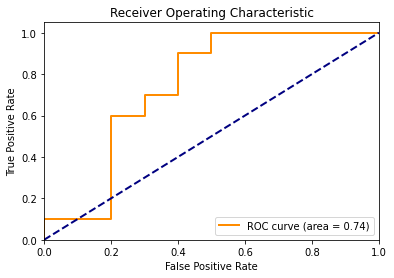

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
model.save('model_2.h5')

Saving images (32).jpg to images (32).jpg
[1.3108988e-09]
images (32).jpg cabai ini sehat 


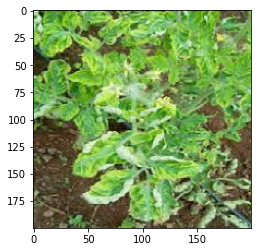

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + " cabai ini sehat ")
  else:
    print(fn + " cabai ini menderita leaf curl ")
 